In [19]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
pip install librosa


   ---------------------------------------- 0.0/260.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/260.7 kB ? eta -:--:--
   --------- ----------------------------- 61.4/260.7 kB 812.7 kB/s eta 0:00:01
   ----------------- ---------------------- 112.6/260.7 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 260.7/260.7 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 64.6/64.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ----------- ---------------------------- 0.3/1.0 MB 6.1 MB/s eta 0:00:01
   ----------------------- ---------------- 0.6/1.0 MB 6.2 MB/s eta 0:00:01
   ---------------------------------- ----- 0.9/1.0 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/164.9 kB ? eta -:--:--
   -----------------------------

C:\Users\KUMAR GAURAV PRAKASH\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


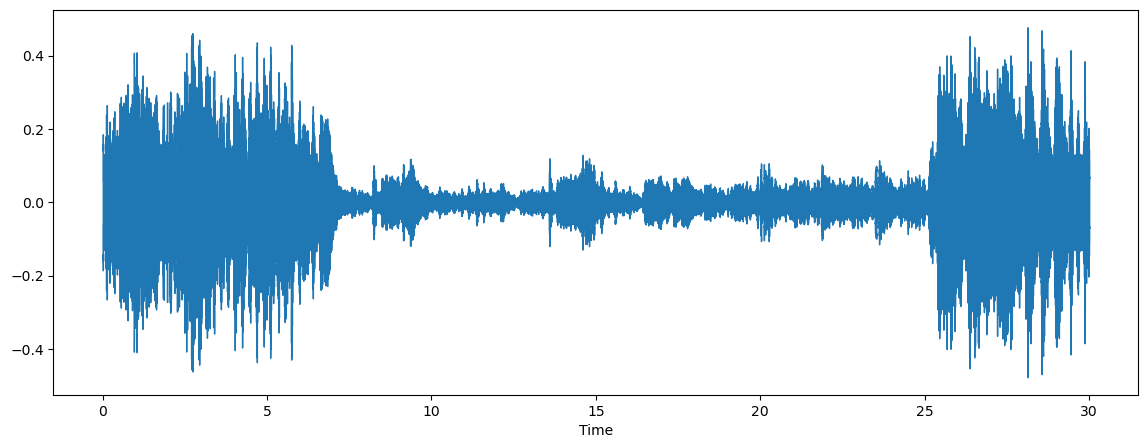

In [4]:
random_file_name ="./Train/classical/classical.00021.wav"
y,sr = librosa.load(random_file_name,sr=22050)#sr= sample rate,more sample rate higher quality, 
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [6]:
sr

22050

In [7]:
from IPython.display import Audio
Audio(data=y,rate=sr)

In [11]:
y

array([ 0.01937866,  0.00561523, -0.02761841, ..., -0.11691284,
       -0.13705444, -0.13754272], dtype=float32)

In [13]:
sr

22050

In [15]:
y.shape

(661794,)

15


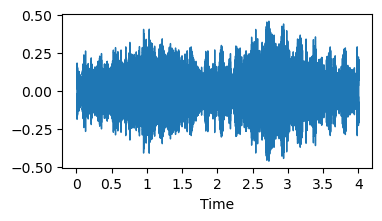

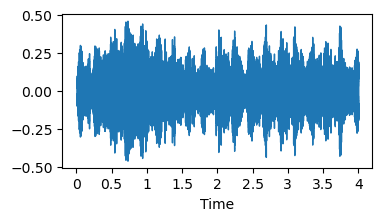

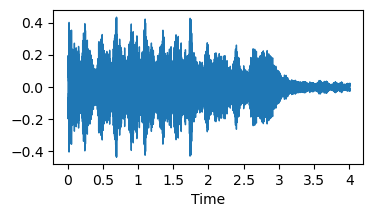

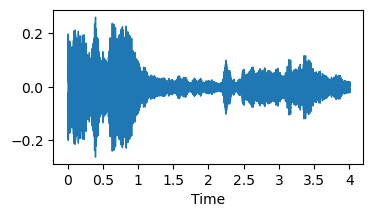

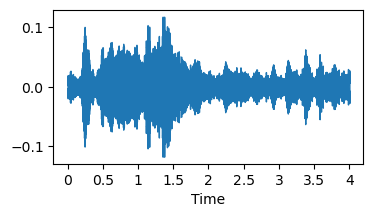

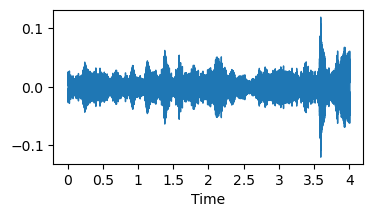

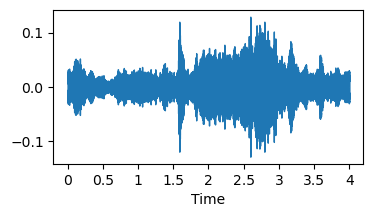

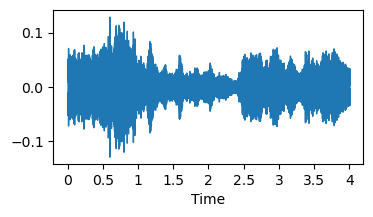

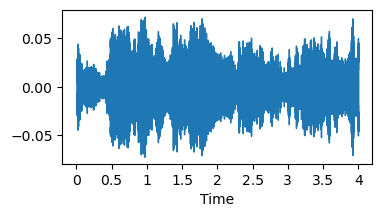

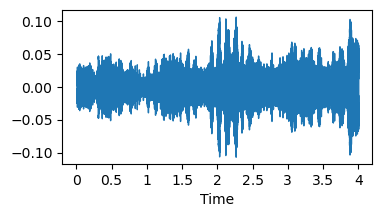

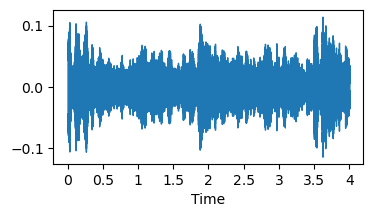

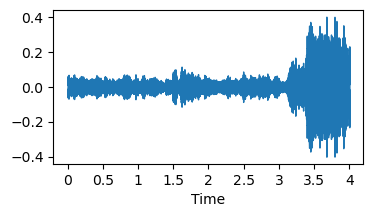

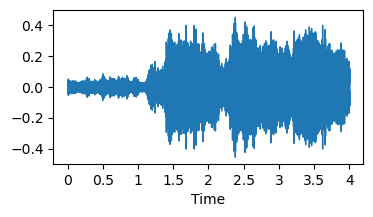

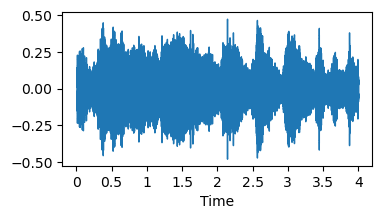

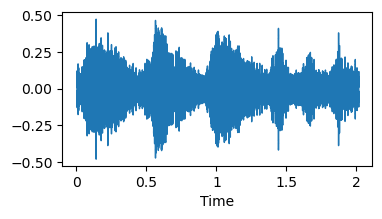

In [29]:
audio_path = "./Train/classical/classical.00021.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
print(num_chunks)
# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

In [30]:
num_chunkes = int(np.ceil((len(y)) / (chunk_samples - overlap_samples)))
num_chunkes #why?

16

In [33]:
#Plotting Melspectrogram of Entire Audio
def plot_melespectrogram(y,sr):
    #Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

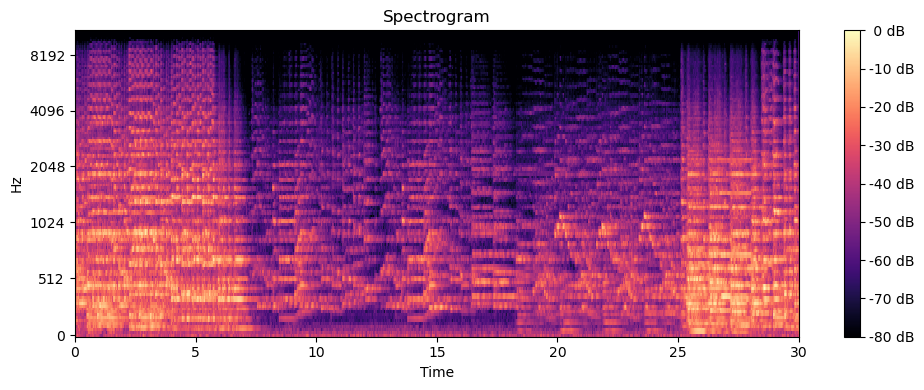

In [35]:
random_file_name = "./Train/classical/classical.00021.wav"
y,sr = librosa.load(random_file_name,sr=sr)
plot_melespectrogram(y,sr)

In [97]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB') #for right sidebar to give values to color
        plt.title("Spectrogram")
        plt.tight_layout() #Adjust the padding between and around subplots.
        plt.show()

In [99]:
path="./Train/classical/classical.00021.wav"

(128, 173)


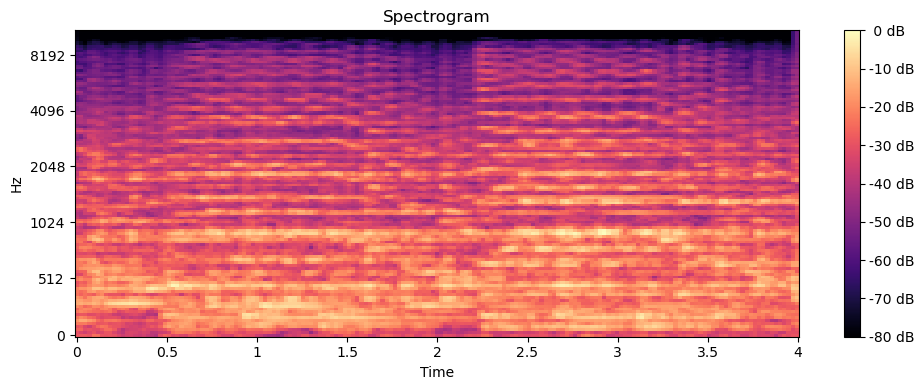

(128, 173)


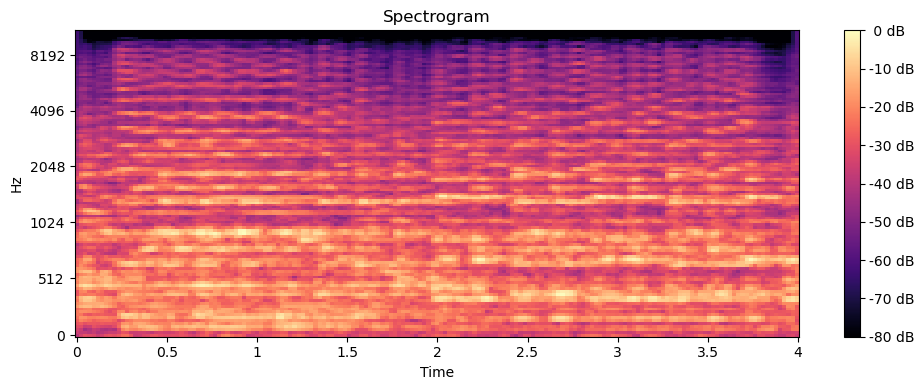

(128, 173)


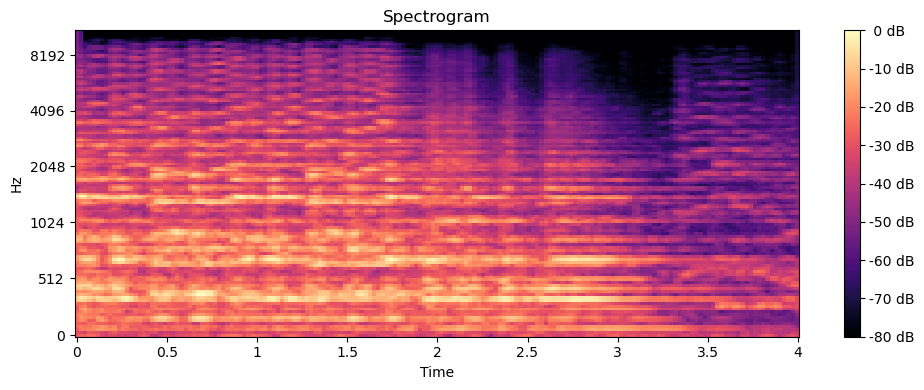

(128, 173)


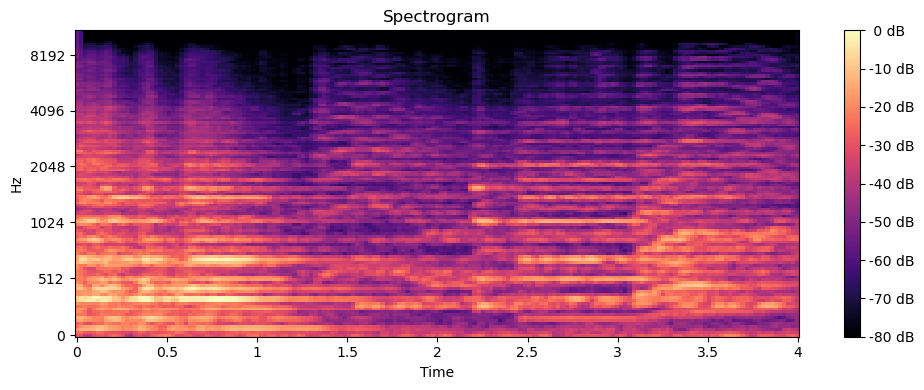

(128, 173)


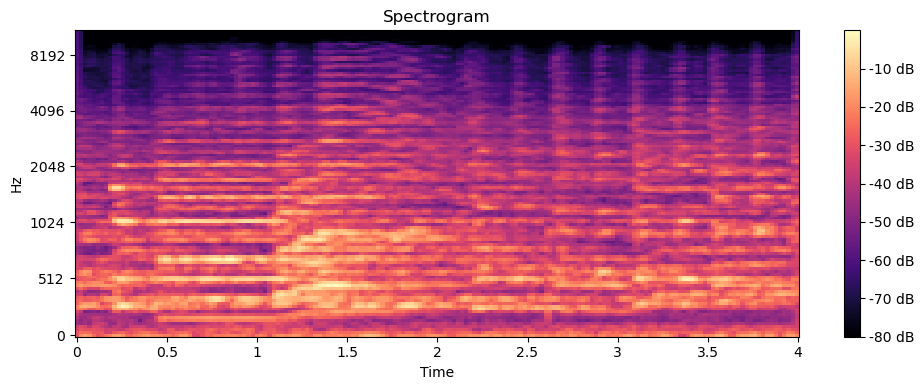

(128, 173)


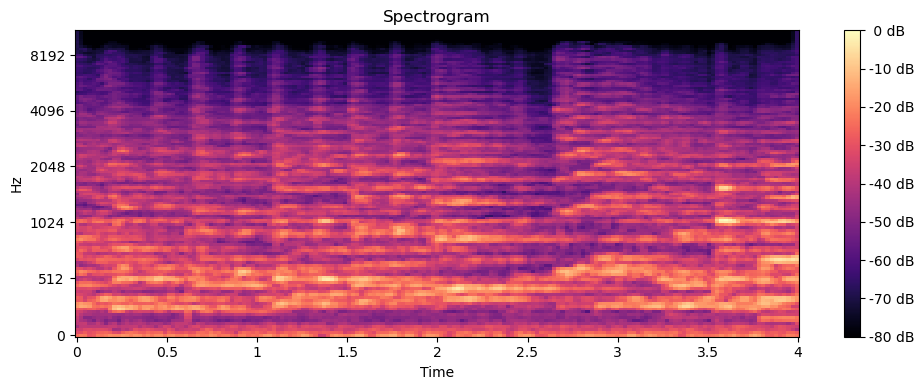

(128, 173)


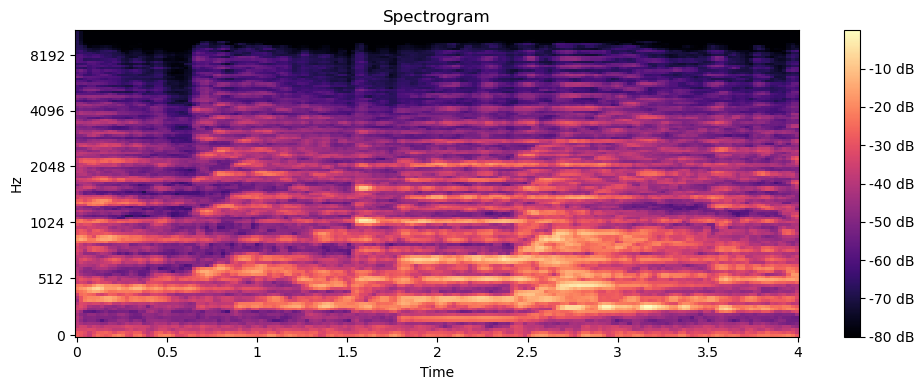

(128, 173)


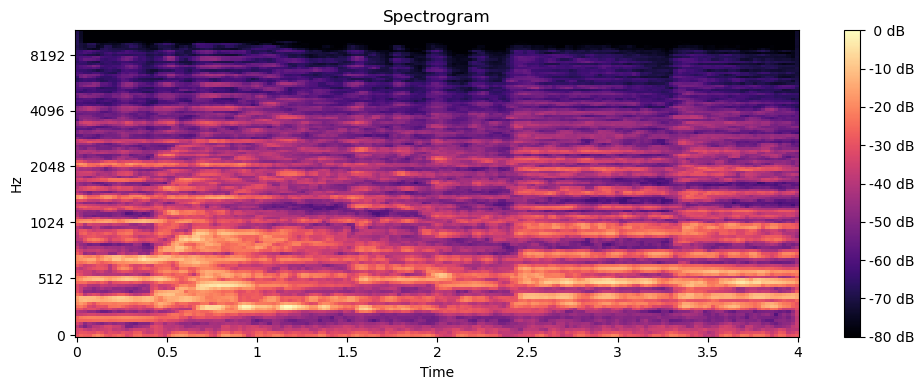

(128, 173)


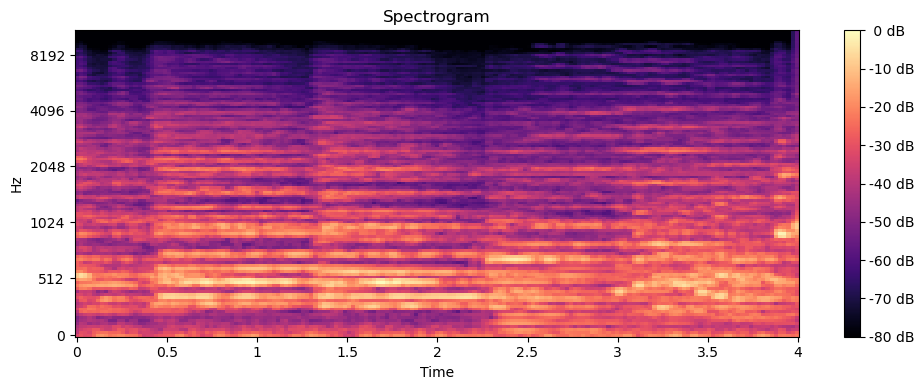

(128, 173)


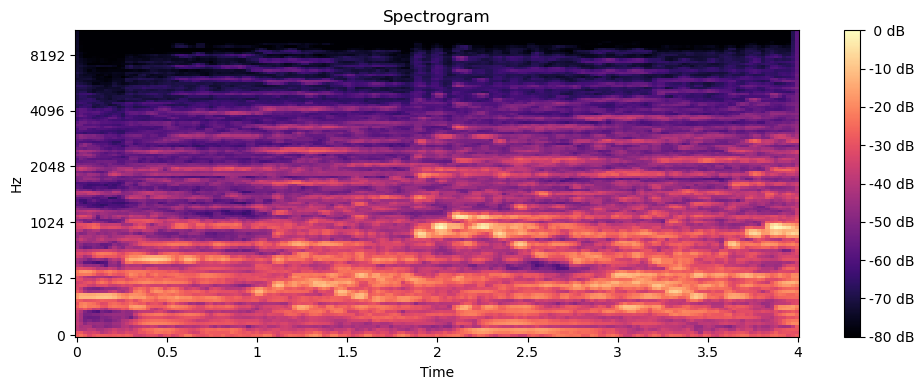

(128, 173)


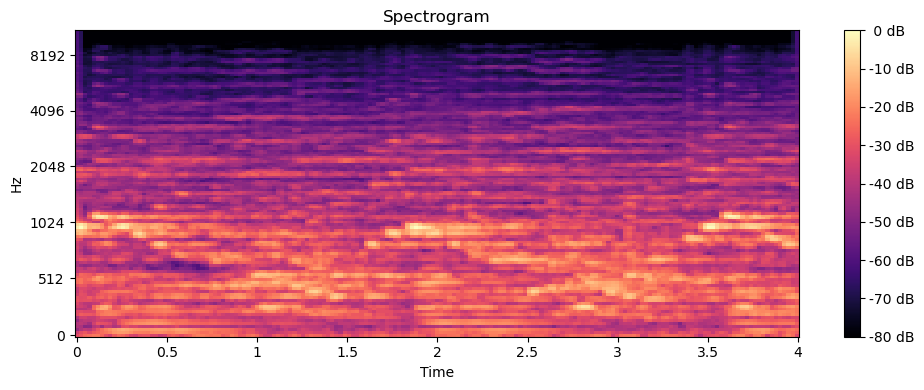

(128, 173)


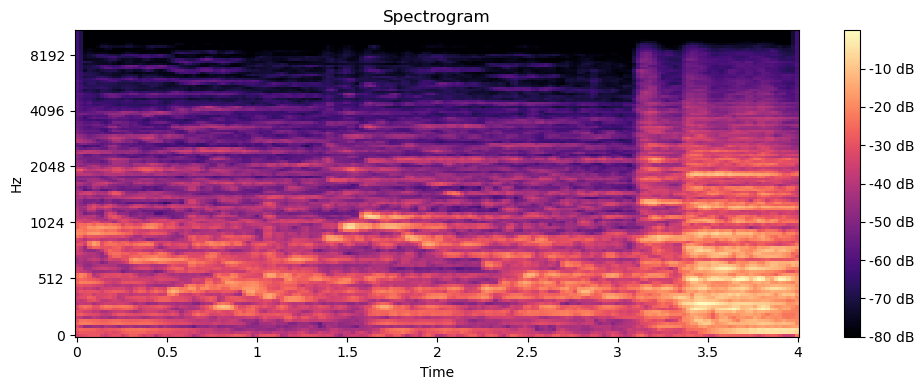

(128, 173)


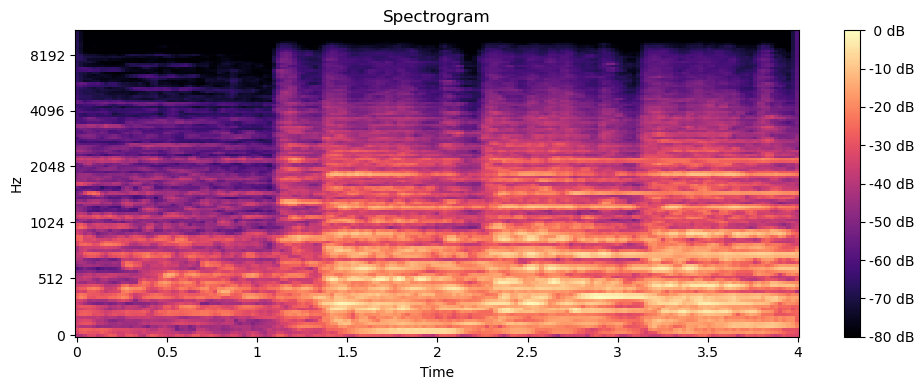

(128, 173)


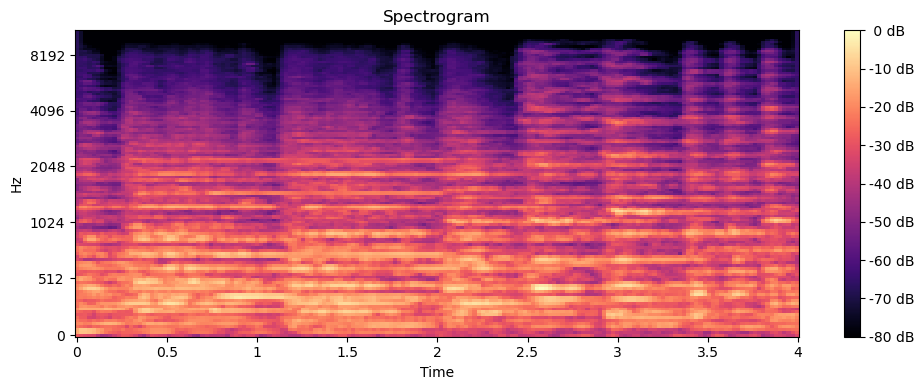

(128, 87)


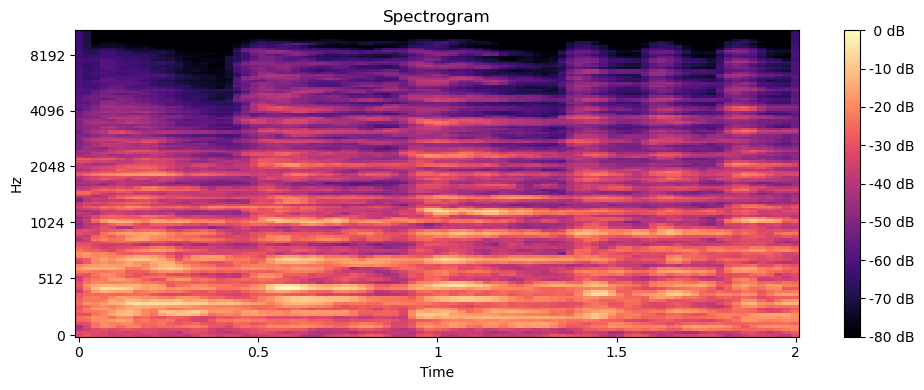

In [101]:
y,sr=librosa.load(path,sr=None)
plot_melspectrogram_chunks(y,sr)

In [3]:
#define your folder structure
data_dir = "./Train"
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']#classes should be in order of folders,
#such that we give correct labels to correct data


In [9]:
from tensorflow.image import resize
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):# consider only audio files,not any
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)

In [11]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [13]:
data.shape
labels.shape

(11979,)

In [15]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [17]:
#can we build model using rasnet or other?

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [23]:
model = tf.keras.models.Sequential()

In [25]:
X_train[0].shape

(150, 150, 1)

In [27]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\KUMAR GAURAV PRAKASH\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Dropout(0.3))

In [35]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [37]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [39]:
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units=1200,activation='relu'))
model.add(Dropout(0.45))

In [41]:
#Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,182,458 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
#Training Model
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.1852 - loss: 2.1626 - val_accuracy: 0.3548 - val_loss: 1.7384
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 281s 936ms/step - accuracy: 0.4043 - loss: 1.6391 - val_accuracy: 0.5017 - val_loss: 1.3695
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 289s 963ms/step - accuracy: 0.5259 - loss: 1.3171 - val_accuracy: 0.6398 - val_loss: 1.0705
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 269s 897ms/step - accuracy: 0.6349 - loss: 1.0463 - val_accuracy: 0.6553 - val_loss: 0.9683
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 265s 884ms/step - accuracy: 0.7010 - loss: 0.8827 - val_accuracy: 0.7375 - val_loss: 0.7872
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 259s 864ms/step - accuracy: 0.7455 - loss: 0.7402 - val_accuracy: 0.6962 - val_loss: 0.9070
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 261s 869ms/step - accuracy: 0.7777 - loss: 0.6471 - val_accuracy: 0.7784 - val_loss: 0.6928
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 258s 859ms/step - accuracy: 0.8197 - lo

In [59]:
model.save("Trained_music_model.h5")

In [55]:
training_history.history

{'accuracy': [0.24626943469047546,
  0.44213712215423584,
  0.5605760216712952,
  0.644683301448822,
  0.7088594436645508,
  0.7527914047241211,
  0.7903579473495483,
  0.8250026106834412,
  0.8504643440246582,
  0.8625691533088684,
  0.8866743445396423,
  0.9090055227279663,
  0.9176666736602783,
  0.9301888942718506,
  0.939580500125885,
  0.9483460187911987,
  0.9491808414459229,
  0.9492852091789246,
  0.9642074704170227,
  0.9707815647125244,
  0.9639987349510193,
  0.9730772972106934,
  0.975477397441864,
  0.9778774976730347,
  0.9726599454879761,
  0.9797558188438416,
  0.9814254641532898,
  0.9765208959579468,
  0.9790253639221191,
  0.983616828918457],
 'loss': [2.028480052947998,
  1.549920916557312,
  1.240655779838562,
  1.020355224609375,
  0.8568627238273621,
  0.72873854637146,
  0.6192457675933838,
  0.5230079889297485,
  0.4472350478172302,
  0.4010831117630005,
  0.3356179893016815,
  0.26090148091316223,
  0.24174341559410095,
  0.20597492158412933,
  0.178668782114

In [57]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [61]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

300/300 ━━━━━━━━━━━━━━━━━━━━ 58s 190ms/step - accuracy: 0.9974 - loss: 0.0112


In [62]:
train_loss,train_accuracy

(0.011400582268834114, 0.9974955916404724)

In [64]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)
val_loss,val_accuracy

75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 188ms/step - accuracy: 0.9105 - loss: 0.3190


(0.30417710542678833, 0.9165275692939758)

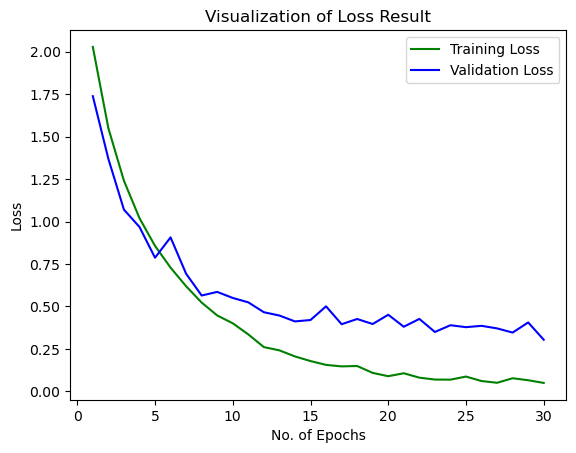

In [73]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['loss'],label="Training Loss",color='green')
plt.plot(epochs,training_history.history['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

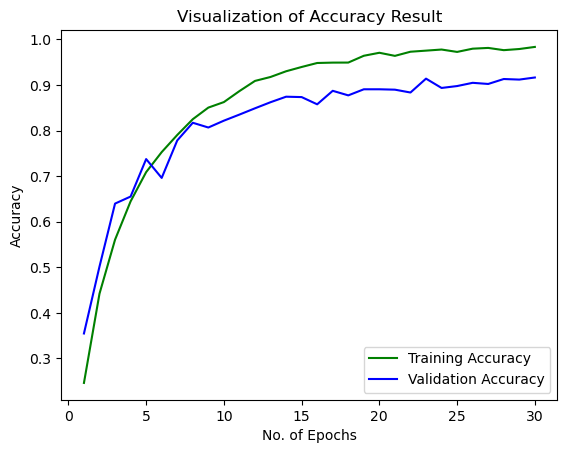

In [75]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],label="Training Accuracy",color='green')
plt.plot(epochs,training_history.history['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()